<h1 style="color:Brown;text-align:center;"> Book Recommender </h1>
<h2 style="color:Tan;text-align:center;">Save time, read more</h2>
<h5 style="color:Black;text-align:left;"> Step 4: Run below section</h5>

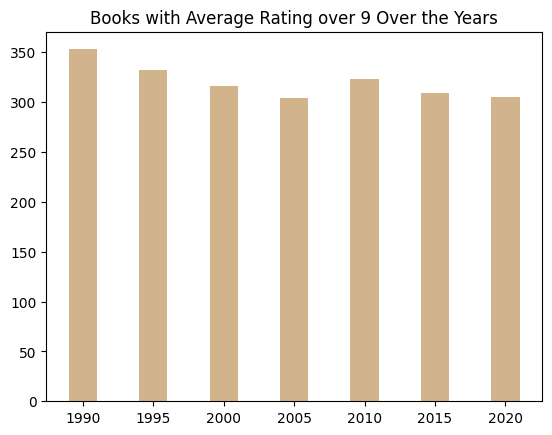

In [4]:
# Display descriptive bar graph with the number of books with an average rating over 9, every 5 years from 1990-2020
high_ratings_graph()

<h5 style="color:Black;text-align:left;"> Step 5: Run below section</h5>

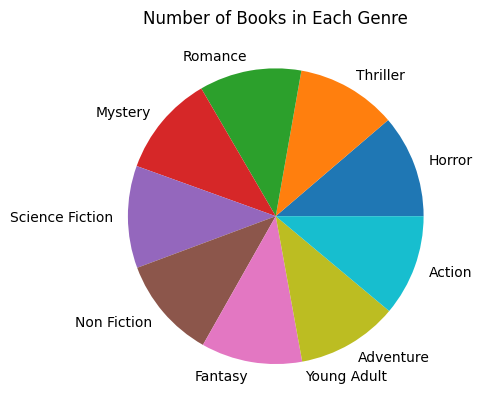

In [5]:
# Display descriptive pie chart with the number of books in each genre
genre_count_chart()

<h5 style="color:Black;text-align:left;"> Step 6: Run below section</h5>

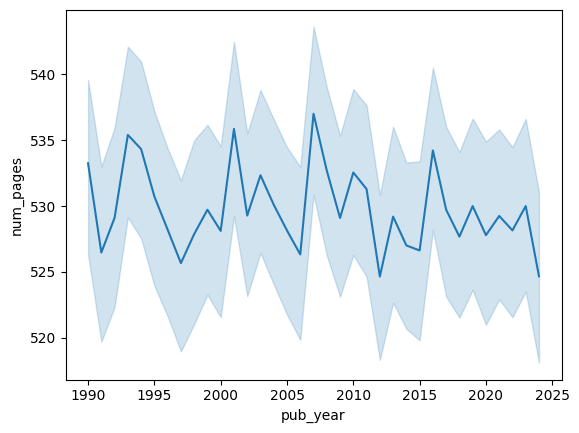

In [6]:
# Display descriptive line graph shows the number of pages in a book per the published year
display(HTML('<h5 style="color:Black;text-align:left;"> Num of pages per published year </h5>'))
genre_year_graph() 

<h3 style="color:Brown;text-align:left;"> Would you like 10 books recommended to you? </h3>
<h5 style="color:Black;text-align:left;"> Step 7: Run below section</h5>
<h6 style="color:Tan;text-align:left;">Then complete the populated fields, at least 1 required, the more fields the more accurate</h6>

In [8]:
# Gather user input and create a dataframe with the user input
column_names=['book', 'author', 'pub_year', 'genre', 'popularity', 'length']
user_df = DataFrame([gather_input()], columns=column_names)

What is your favorite book? The Way of Kings
Who is your favorite author? Brandon Sanderson
What year do you prefer books to be published after? 2010
What is your favorite genre? Fantasy
Do you prefer books that are highly, mid, or low rated? High
Do you prefer short, medium, or long books? Long


<h3 style="color:Brown;text-align:left;"> Calculate your recommendations? </h3>
<h5 style="color:Black;text-align:left;"> Step 8: Run below section</h5>
<h5 style="color:Black;text-align:left;">Review your results beneath the below section</h5>

In [9]:
# Filter book data with the input year, rating preference, and length.
filter_book_data()

# Set the all column for the transformation and cosine distance calculation to only include the book/title, genre, and author for both dataframes
user_df['all'] = user_df['book'] + ' ' + user_df['genre'] + ' ' + user_df['author']
book_df['all'] = book_df['title'] + ' ' + book_df['genre'] + ' ' + book_df['author']

# Convert the book data results into a dataFrame
transformation = CountVectorizer(stop_words='english', tokenizer=word_tokenize, token_pattern=None) 
books = transformation.fit_transform(book_df['all'].values.astype('U')) 
user = transformation.transform(user_df['all'])

# Calculate the cosine distance for the user's input information and the database of books
dist = cosine_distances(user, books)

# Find the closest ten for the best recommendations 
neighbors_indexes = dist.argsort()[0, 1:11]
neighbors = book_df.iloc[neighbors_indexes]

# Display a non-descriptive table with the 10 book recommendations for the user, predicted based on user's input 
display_columns = neighbors.drop(columns=['all', 'publisher'])
display(HTML("Here is the information for 10 books that you may like: "))
display(HTML(display_columns.to_html(index=False)))


isbn,title,author,pub_year,avg_rating,num_pages,genre
0345246438,Way to Dawnworld,Bill Starr,2021,0.00,860,Fantasy
031286888X,The Kings in Winter,Cecelia Holland,2022,0.00,363,Fantasy
0679450092,Bloodstained Kings,Tim Willocks,2020,5.00,937,Fantasy
0385241194,Quite the Other Way,Kaylie Jones,2021,0.00,483,Fantasy
067170818X,The Easy Way Out,Stephen McCauley,2016,0.00,171,Fantasy
0887764274,Way to Schenectady,Richard Scrimger,2020,0.00,254,Fantasy
0670871931,The Only Way I Know,Cal Ripken,2011,5.67,501,Fantasy
0888940068,The pathless way,Justin De Goutiere,2019,0.00,816,Fantasy
1862543259,The Long Way Home: 'Nobody Goes That Way',Lydia Laube,2012,0.00,193,Fantasy
006103021X,A Long Way from Home,Connie Briscoe,2013,0.00,979,Fantasy


<h5 style="color:Black;text-align:left;"> Step 1: Run below section</h5>

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances
from nltk.tokenize import word_tokenize
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import DataFrame

# Import book data from CSV file into a pandas dataframe
book_dtype = {'isbn': 'str', 'title': 'str', 'author': 'str', 'publisher': 'str', 'avg_rating': 'float', 'num_pages': 'int', 'genre': 'str', 'pub_year': 'int'} 
book_df = pd.read_csv('bookData.csv', dtype=book_dtype, usecols=[0, 1, 2, 3, 4, 5, 6, 7])

<h5 style="color:Black;text-align:left;"> Step 2: Run below section</h5>

In [2]:
# Methods for the machine learning algorithm content based filtering 

# Collect user input and normalize the data type for the requested publish year
def gather_input():
    # Collect user input
    book = input('What is your favorite book?')
    author = input('Who is your favorite author?')
    pub_year = input('What year do you prefer books to be published after?')
    genre = input('What is your favorite genre?')
    popularity = input('Do you prefer books that are highly, mid, or low rated?')
    length = input('Do you prefer short, medium, or long books?')

    # Verify publish year is an integer, if not assign it an empty string
    if pub_year.isdigit():
        pub_year = int(pub_year)
    else:
        pub_year = ''
    return [book, author, pub_year, genre, popularity, length]
    
# Filter book data to not include the specied years, ratings, and pages 
def filter_book_data():
    global book_df
    # Check if the user input a value for publication year, if they did then add a where clause to only include books published after the specified year
    published = user_df.loc[0, 'pub_year']
    if published != '':
        book_df = book_df[book_df['pub_year'] > int(published)]
    #Check if user input a value for their popularity preference, if they did depending on the response (high, mid, low) assign a range of ratings 
    popularity = user_df.loc[0, 'popularity'].lower()
    if popularity != '':
        if 'high' in popularity:
            book_df = book_df[book_df['avg_rating'] > 7.00]
        elif 'mid' in popularity:
            book_df = book_df[book_df['avg_rating'] < 7.00]
            book_df = book_df[book_df['avg_rating'] > 4.00]
        elif 'low' in popularity:
            book_df = book_df[book_df['avg_rating'] < 4.00]
    
    #Check if user input a value for their length preference, if they did depending on the response (long, medium, short) assign a range of numbers of pages
    length = user_df.loc[0, 'length'].lower()
    if length != '':
        if 'long' in length:
            book_df = book_df[book_df['num_pages'] > 500]
        elif 'medium' in length:
            book_df = book_df[book_df['num_pages'] < 500]
            book_df = book_df[book_df['num_pages'] > 300]
        elif 'short' in length:
            book_df = book_df[book_df['num_pages'] < 300]

<h5 style="color:Black;text-align:left;"> Step 3: Run below section</h5>

In [3]:
#Methods for the visuals

# Helper method for method high_ratings. Pull all the books with the input published year and an average rating over 9, return the count
def count_year(year):
    filtered_df = book_df[(book_df['pub_year'] == year) & (book_df['avg_rating'] > 9.0)]
    return filtered_df.shape[0]

# Display the number of books with a rating above 9 for every 5 years from 1990 to 2020
def high_ratings_graph():
    x = [1990, 1995, 2000, 2005, 2010, 2015, 2020]
    y = [count_year(1990), count_year(1995), count_year(2000), count_year(2005), count_year(2010), count_year(2015), count_year(2020)]
    plt.title('Books with Average Rating over 9 Over the Years')
    plt.bar(x, y, color='tan', width=2)
    plt.show()

# Display the number of books with a rating above 9 for every 5 years from 1990 to 2020
def genre_year_graph():
    sns.lineplot(x="pub_year", y="num_pages", data=book_df)

# Helper method for method genre_count_chart. Pull all the books with the specific genre and return the count
def count_genre(genre):
    filtered_df = book_df[(book_df['genre'] == genre)]
    return filtered_df.shape[0]

# Display the number of books in each genre in a pie chart 
def genre_count_chart():
    x = [count_genre('Horror'), count_genre('Thriller'), count_genre('Romance'), count_genre('Mystery'), count_genre('Science Fiction'), count_genre('Non Fiction'), count_genre('Fantasy'), count_genre('Young Adult'), count_genre('Adventure'), count_genre('Action')]
    y = ['Horror', 'Thriller', 'Romance', 'Mystery', 'Science Fiction', 'Non Fiction', 'Fantasy', 'Young Adult', 'Adventure', 'Action']
    plt.title('Number of Books in Each Genre')
    plt.pie(x, labels=y)
    plt.show()

# Display the book data in a scatterplot
def book_data_scatter():
    filtered_df = book_df[(book_df['pub_year'] == 2024) & (book_df['num_pages'] > 1000)]
    seaborn.scatterplot(data=filtered_df)